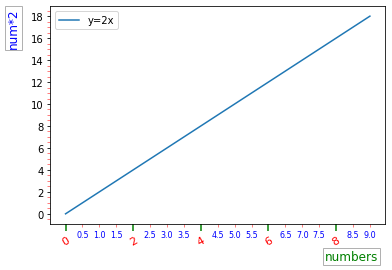

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FixedLocator,FuncFormatter,FormatStrFormatter
'''
设置坐标轴刻度的主要类，储存在ticker模块中。ticker中有两个重要的类：Locator和Formatter。locator决定刻度线位置，Formatter决定刻度线样式。
刻度线主要包括主要刻度线和次要刻度线。次要刻度线默认不显示。
AutoMinorLocator的作用是根据主要刻度线查找次要刻度线的位置。只接受一个参数n，表示主要刻度之间的次要刻度的分量。默认n等于5或4。
MultipleLocator的作用是在坐标轴上设置刻度线的位置，接受的是整数，即每隔整数位置之后就设置一个刻度。其接受参数base，默认为1.0。
FixedLocator([str])的作用是在坐标轴上根据传递的列表设置刻度线的位置。
FuncFormatter的作用是对坐标轴上的数字标签进行格式化，其接受一个函数，函数有两个参数（刻度值x和刻度位置pos），返回结果是包含标签的字符串。
FuncFromatter往往适用于使用函数对标签进行批量转换。
FormatStrFormatter适用于对数字进行批量转换，使用的往往是旧式运算符
'''
x = np.arange(10)
y = x*2
ax = plt.subplot(111)

#设置主刻度，在轴上每隔1个单位设置一个主刻度，主刻度的标签自动显示。设置主刻度的方法是set_major_locator()
ax.xaxis.set_major_locator(MultipleLocator(2.0))
ax.yaxis.set_major_locator(MultipleLocator(2.0))

#设置次要刻度，在每个单位之间分4等分设置次要刻度，默认不显示次要刻度的标签。设置次要刻度的方法是set_minor_locator()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

#设置轴上次要刻度的文字标签，首先编译一个函数，作用是：当数字能整除2，表明是主刻度，不做修改。数字不能整除2，表明是次要刻度，显示之
def tick(x,pos):
    if x%2 == 0:
        return ''
    else:
        return "%.1f"%x
ax.xaxis.set_minor_formatter(FuncFormatter(tick))

'''
设置主次要刻度线的样式,即主次要刻度在坐标轴上突出显示的方法。
设置刻度线样式使用tick_params，接受参数(axis,which,length,width,color,labelcolor,labelsize，**kwargs)。axis指在哪个轴上设置。
which指设置的是主要刻度(major)还是次要刻度(minor)，或是都设置(both)，length指刻度线的长度，width指刻度线的宽度，color指刻度线的颜色。labelsize指刻度标签的
文字大小，labelcolor指刻度标签的文字颜色。labelrotation指刻度标签的逆时针旋转角度。
'''
ax.tick_params('x',which='major',length=7,width=1.5,color='g',labelcolor='r',labelsize=11,labelrotation=30)
ax.tick_params(which='minor',length=3,width=0.5,color='r',labelcolor='b',labelsize=8)

'''
设置坐标轴标题及样式。set_xlabel(label,fontsize,color,bbox)，bbox指标题的其他样式，如边框pad，填充色facecolor，透明度alpha等。
set_label_coords表示设置坐标轴标题的位置，默认是在中间，这种设置方式是精确的确定其位置。
'''
ax.xaxis_label='numbers'
ax.yaxis_label='num*2'
box=dict(facecolor='w',pad=2,alpha=0.3)

ax.set_xlabel(ax.xaxis_label,fontsize=12,color='g',bbox=box)
ax.set_ylabel(ax.yaxis_label,fontsize=12,color='b',bbox=box)


#设置坐标轴标题位置。set_label_coords接受(x,y)元组，x表示标题距离轴向x倍的距离，在x轴上表示距y轴的距离，y轴上表示距x轴的距离。
#(x,y)中的y表示距轴向y倍的距离，在x轴上表示距x轴的距离，在y轴上表示距y轴的距离。
#取值范围在0-1，表示倍数，负值表示相反方向。
ax.xaxis.set_label_coords(0.9,-0.12)
ax.yaxis.set_label_coords(-0.09,0.9)

plt.plot(x,y,label='y=2x')
plt.legend()
plt.show()

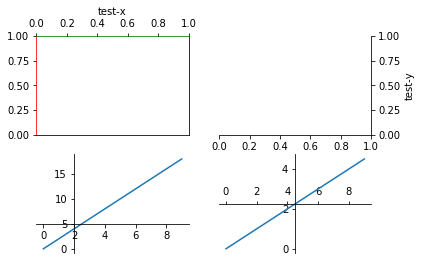

In [87]:
#设置坐标轴在图像的何处。
#通过set_ticks_position()可以调整轴线的排列位置。top表示在顶部，right表示在右边。x轴只可以设置top，y轴只可以设置right。x轴默认在下方，y轴默认在左边。
#设置标签位置也是如此，使用的是set_label_position()
x = np.arange(10)
y1 = x*2
y2 = x/2
ax1 = plt.subplot(2,2,1)
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
#通过spines方法获得图像方向上的轴实例。图像四周是有轴的，只是空轴上没有刻度。获取实例之后可以通过set_color改变其轴线颜色，也可以通过set_visible使其不可见。
ax1.spines['top'].set_color('g')
ax1.spines['left'].set_color('r')
ax1.set_xlabel('test-x')

ax2 = plt.subplot(2,2,2)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_ylabel('test-y')

ax3 = plt.subplot(2,2,3)
ax3.plot(x,y1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
#通过set_position设置轴线的位置,其接受一个元组(a.b)，a表示坐标系统，'data'表示以绘图数据的值作为参照，b为数据的值。
ax3.spines['left'].set_position(('data',2))
ax3.spines['bottom'].set_position(('data',5))

ax4 = plt.subplot(2,2,4)
ax4.plot(x,y2)
ax4.xaxis.set_ticks_position('top')

ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
#set_position接受的元组参数中，a也可以赋值为'axes'，表示以图形为参照，b表示相对值，取值为0-1。还可以赋值为'outward'，表示在原有图形区域之外放置。
ax4.spines['top'].set_position(('axes','0.5'))#'axes,0.5'等价于set_position('center')
ax4.spines['left'].set_position(('axes','0.5'))
plt.show()